**0. LOADING LIBRARIES AND DATA CLEANING**

In [29]:
#Loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset

import ast

#Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df

#Clean data
df.job_posted_date = pd.to_datetime(df.job_posted_date)
df.job_skills=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

**1. TOP DATA JOBS IN VIETNAM**

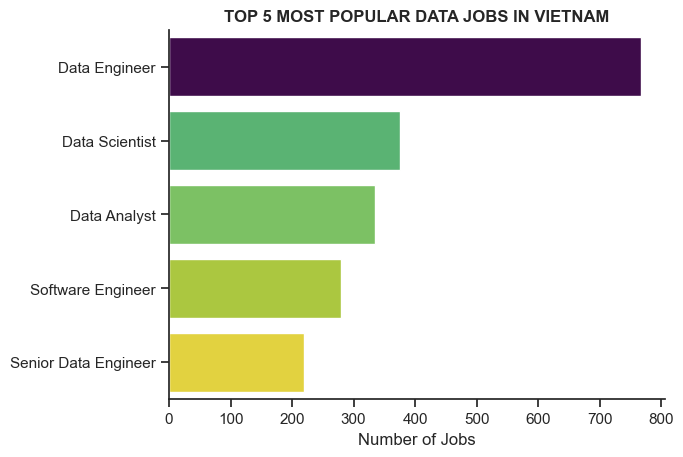

In [120]:
df_Vietnam=df[df['job_country']=='Vietnam']
df_plot=df_Vietnam.job_title_short.value_counts().head().to_frame()
sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count',y='job_title_short',hue='count',legend=False,palette="viridis_r")
sns.despine()
plt.title('TOP 5 MOST POPULAR DATA JOBS IN VIETNAM', fontweight='bold')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

**2. DISTRIBUTION OF JOB BENEFITS AND REQUIREMENTS IN VIETNAM**

<Figure size 640x480 with 0 Axes>

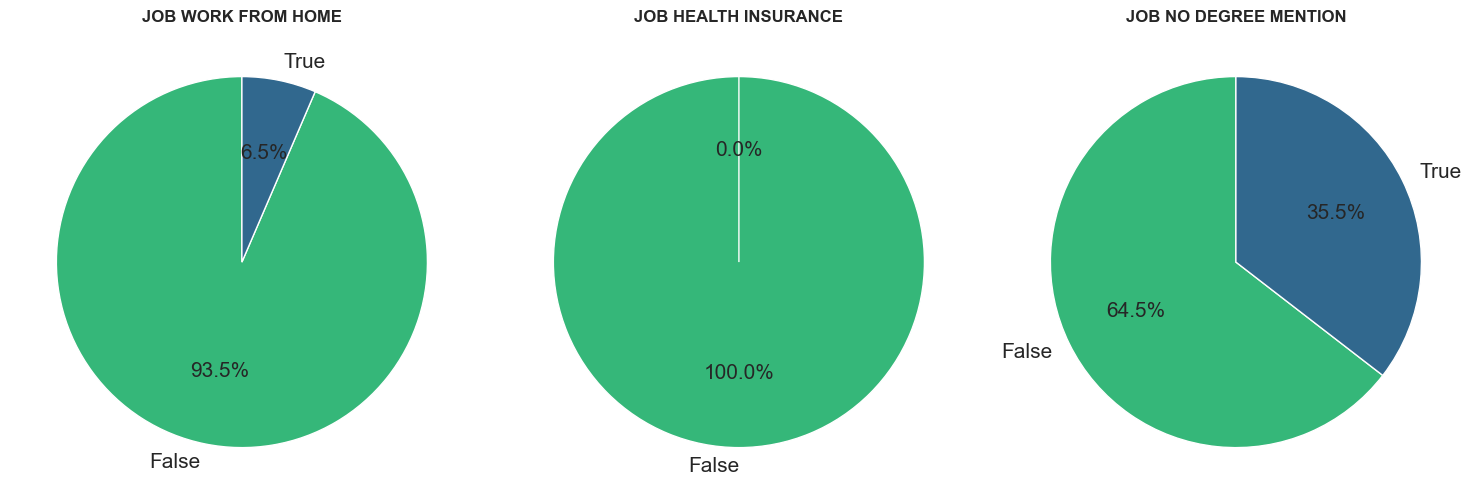

In [128]:
sns.set_theme(style='ticks')
sns.despine()
variables = ['job_work_from_home', 'job_health_insurance', 'job_no_degree_mention']
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i, variable in enumerate(variables):
    counts = df_Vietnam[variable].value_counts()
    counts = counts.reindex([False, True])

    counts.plot(
        kind='pie',
        startangle=90,
        autopct='%1.1f%%',
        ax=ax[i],
        labels=['False', 'True'],
        colors=sns.color_palette("viridis_r", n_colors=2),
        textprops={'fontsize': 15}
    )

    ax[i].set_title(variable.replace('_', ' ').upper(), fontweight='bold')
    ax[i].set_ylabel('')  

plt.tight_layout()

plt.show()
    


**3. JOB DISTRIBUTION BY JOB PLACES**

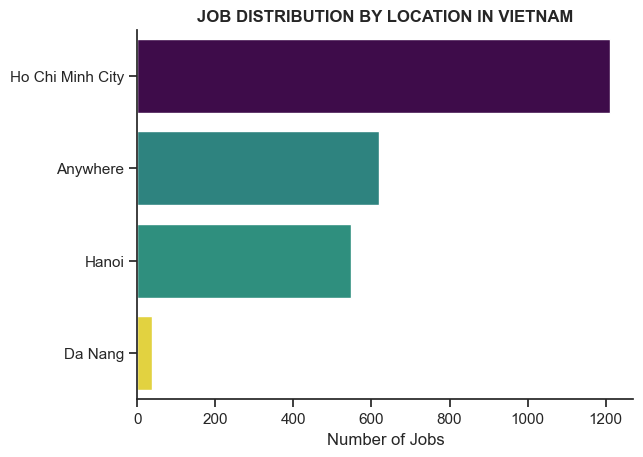

In [119]:
df_Vietnam_location=df_Vietnam.copy()
df_Vietnam_location.reset_index(drop=True,inplace=True)
df_Vietnam_location['job_location'] = df_VN['job_location'].apply(lambda x: 'Hanoi' if 'Hanoi' in x else x)
df_Vietnam_location['job_location'] = df_VN['job_location'].apply(lambda x: 'Da Nang' if ' Da Nang' in x else x)
df_Vietnam_location['job_location'] = df_VN['job_location'].apply(lambda x: 'Ho Chi Minh City' if 'Ho Chi Minh City' in x else x)
df_Vietnam_location['job_location'] = df_VN['job_location'].apply(lambda x: 'Anywhere' if 'Vietnam' in x else x)
df_Vietnam_location=df_Vietnam_location['job_location'].value_counts().to_frame()
df_Vietnam_location

sns.barplot(data = df_Vietnam_location, x="count", y='job_location',hue='count',legend=False,palette="viridis_r")
sns.set_theme(style='ticks')
sns.despine()
plt.title('JOB DISTRIBUTION BY LOCATION IN VIETNAM', fontweight='bold')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()


**4. JOB DISTRIBUTION BY COMPANIES**

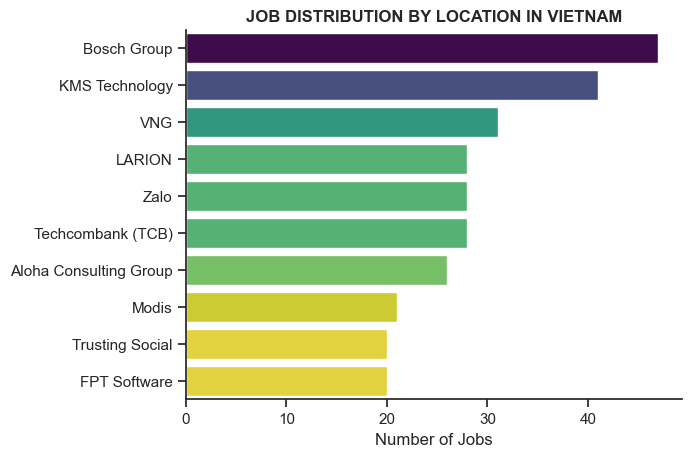

In [143]:
df_Vietnam_company=df_Vietnam['company_name'].copy().value_counts().to_frame().head(10)
df_Vietnam_company

sns.barplot(data = df_Vietnam_company, x="count", y='company_name',hue='count',legend=False,palette="viridis_r")
sns.set_theme(style='ticks')
sns.despine()
plt.title('JOB DISTRIBUTION BY LOCATION IN VIETNAM', fontweight='bold')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()
